### Import Dependencies

In [1]:
import glob
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import random

### Create the paths to retrieve images

In [2]:
DataDir = 'ignore_folder/data'
Categories_all = ['a5df', 'a447', 'a440', 'a476', 'a67e', 'ae61', 'a470', 'a448', 'a9d2', 'a44a', 'a5d0', 'a569', 'acdb', 'a8e2', 'a558', 'a4ce', 'a4f1', 'a4e9', 'a6ca', 'b773', 'ab42', 'a8e4', 'a4e8', 'ad78', 'b944', 'a8c6', 'a6d1', 'a977', 'a57e', 'a8a3', 'a4d2', 'a6b3', 'a8ad', 'a740', 'a8bd', 'a8ae', 'a4a7', 'b3a3', 'a46c', 'a464', 'a656', 'a5fe', 'a455', 'a5c1', 'a658', 'b3be', 'a45d', 'a9fa', 'a46b', 'a9ce', 'a453', 'ac46', 'a454', 'b3bd', 'a5c9', 'a650', 'a668', 'a5fd', 'a5d5', 'a5aa', 'a5db', 'a7da', 'a5a6', 'a475', 'a5bf', 'adfb', 'a474', 'a473', 'afe0', 'a8c3', 'a55b', 'bec7', 'b54c', 'a6e7', 'a4ec', 'a4fb', 'a751', 'a56b', 'b0a8', 'a4f4', 'a6e6', 'a4e2', 'a6e8', 'a4e5', 'a4fd', 'bb50', 'ab48', 'a4c0', 'a4eb', 'b0aa', 'a8e0', 'a6a8', 'a6db', 'bb44', 'b16f', 'a8d3', 'a6b9', 'a540', 'a6d5', 'b0ea', 'aaf8', 'a8a7', 'a4d1', 'a4bd', 'a6b8', 'b6c0', 'a4a3', 'a548', 'a4a4', 'aaf7', 'b160', 'a6d3', 'aaf9', 'aacc', 'a86b', 'aa47', 'a467', 'b1d0', 'a451', 'a45f', 'a5ce', 'a457', 'adab', 'aa46', 'a46a']

### Check if path works

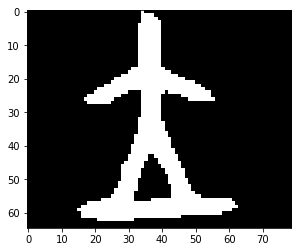

In [3]:
for category in Categories_all:
    path = os.path.join(DataDir,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

### Check out the shape of the image

In [4]:
img_array.shape

(65, 79)

### Resize the Image

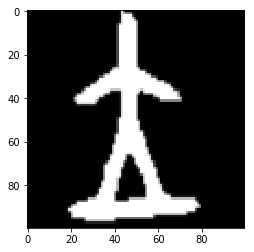

In [5]:
IMG_X = 100
IMG_Y = 100

new_array = cv2.resize(img_array, (IMG_Y, IMG_X)) # after checkning they need to be rearanged
plt.imshow(new_array, cmap='gray')
plt.show()

### Display how numpy.average works

In [6]:
np.average(new_array, axis=0)

array([  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.5 ,   3.87,  12.14,  17.5 ,  22.85,  31.68,
        31.68,  34.27,  38.97,  44.04,  46.92,  50.19,  51.  ,  52.44,
        56.17,  62.65,  68.79,  81.33,  91.4 ,  94.78, 101.24, 112.91,
       115.74, 129.56, 171.23, 199.58, 196.76, 189.19, 185.66, 188.42,
       188.12, 190.52, 159.64, 107.9 ,  98.44, 104.2 , 105.91, 103.08,
        96.36,  87.29,  80.67,  70.36,  61.34,  57.85,  51.61,  45.69,
        43.22,  41.19,  34.81,  31.84,  31.17,  27.98,  22.51,  19.44,
        19.38,  17.32,  15.75,  15.75,  15.75,  10.01,   5.63,   2.48,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ])

### Create function to create list with resized images

In [7]:
data = []

def create_training_data():
    for category in Categories_all:
        path = os.path.join(DataDir, category)
        class_num = Categories_all.index(category)
        for img in os.listdir(path):
            if 'jinwen' in img:
                class_type = 'jinwen'
            if 'chuxi' in img:
                class_type = 'chuxi'
            if 'smallseal' in img:
                class_type = 'smallseal'
            if 'oracle' in img:
                class_type = 'oracle'
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_Y, IMG_X))
                data.append([new_array, category, class_type])
            except Exception as e:
                print('something went wrong')


### Create list

In [8]:
create_training_data()

### Shuffle data

In [9]:
random.shuffle(data)

### Check out form of the list

In [10]:
data[0]

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'a476', 'chuxi']

### Split trainging data and testing data 

In [11]:
testing_data = data[-100:]
training_data = data[0:-100]

In [12]:
print("{} + {} = {}".format(len(testing_data), len(training_data), len(data)))

100 + 8132 = 8232


### Function for createing "fingerprints" of images

In [13]:
finger_print = []

def create_finger_print(data):
    for picture in data:
        horizontal_average = np.average(picture[0], axis=1)
        vertical_average = np.average(picture[0], axis=0)
        finger_print.append([horizontal_average, vertical_average, picture[1], picture[2]])

### Generate list of "fingerpints"

In [14]:
create_finger_print(training_data)

### Check out the form of the "fingerprint"

In [15]:
print(finger_print[0])

[array([  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   1.84,   6.21,  27.18,
        47.22,  61.61,  72.92,  82.91,  91.25,  99.63, 107.22, 111.57,
       111.55, 112.39, 137.53, 139.69, 125.29, 114.88, 105.47,  97.03,
        90.66,  82.69,  72.44,  56.3 ,  45.31,  45.33,  57.15,  72.29,
        88.79,  98.  , 104.84, 113.29, 108.  ,  96.61,  94.62,  90.07,
        84.28,  92.66,  93.66,  87.3 ,  70.99,  54.21,  37.43,  29.9 ,
        29.44,  40.14,  64.14,  89.66, 110.65, 120.75, 126.8 , 133.12,
       143.7 , 154.57, 150.02, 137.28, 119.19, 115.07, 109.93, 103.77,
        93.26,  83.51,  75.14,  64.98,  55.32,  46.91,  38.56,  30.19,
        21.85,  16.4 ,  11.27,   2.89,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ]), array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+

### Create function to return the chinese character whos "fingerprint" best matches the "fingerprint" of the testing image

In [16]:
def fingerprint_test(sample_picture, fingerprint_data):
    horizontal_average = np.average(sample_picture[0], axis=1)
    vertical_average = np.average(sample_picture[0], axis=0)
    best_guess = []
    for x in fingerprint_data:
        best_guess.append([int(sum(abs(horizontal_average-x[0])) + sum(abs(vertical_average-x[1]))), x[2] + "-" + x[3]])
    best_guess_index = np.argmin([x[0] for x in best_guess])
    return best_guess[best_guess_index][1], training_data[best_guess_index][0]



### Prediction with a sample testing image

In [17]:
fingerprint_test(testing_data[45], finger_print)[0]

'a4eb-oracle'

### Create a function to test my models accuracy

In [18]:
def model_accuracy(array_of_test_images, finger_print_data):
    test_number = 0
    correctly_guessed = 0
    image = []
    guess = []
    for x in array_of_test_images:
        test_number += 1
        if fingerprint_test(x, finger_print_data)[0] == x[1] + "-" + x[2]:
            correctly_guessed += 1
        else:
            image.append([x[0], x[1] + "-" + x[2]])
            guess.append(fingerprint_test(x, finger_print_data))
    return correctly_guessed/test_number, image, guess

### Run function and save the return object for investigation

In [19]:
answer = model_accuracy(testing_data, finger_print)

### Model accuracy

In [20]:
answer[0]

0.63

### Sample image wrongfully categorized

['a4fd-jinwen']


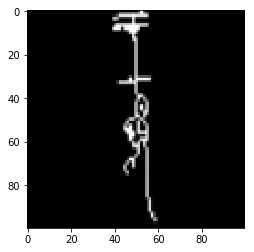

In [21]:
plt.imshow(answer[1][0][0], cmap='gray')
print(answer[1][0][1:3])

### Models Guess

a46c-jinwen


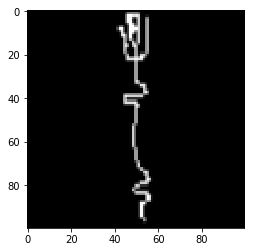

In [22]:
plt.imshow(answer[2][0][1], cmap='gray')
print(answer[2][0][0])

### Not too bad lol
### For further work I will look at adding more axis to take the average values and will change the function to ranke different guesses and see if with the ranking I can make a better prediction